#GRIPDECEMBER22

The Sparks Foundation

## Task1 - Prediction Using Supervised ML

Predict the percentage marks of a student based on no. of study hours

The ensuing solution was obtained via Linear Regression technique from the Sci-kit learn library

### Step 1 - Importing the relevant libraries

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Step 2 - Data Acquisation

In [58]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [59]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [60]:
df.shape

(25, 2)

In [61]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

### Step 3 - Data Wrangling and Cleaning

In [62]:
#checking for missing values

df.apply(lambda x: sum(x.isnull()))

Hours     0
Scores    0
dtype: int64

There are no missing values in our data

In [63]:
# checking for duplicate values
df.duplicated().any()

False

There are no duplicate values

<AxesSubplot: >

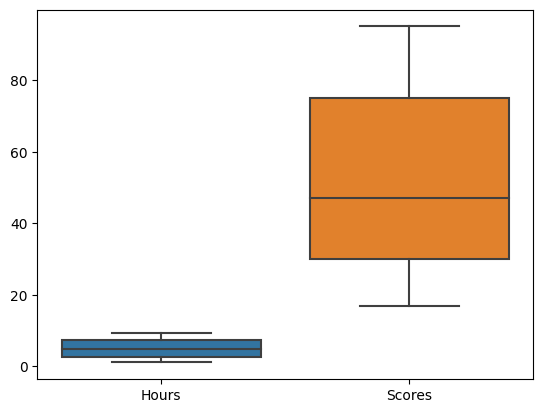

In [77]:
# checking for outliers
sns.boxplot(data=df)

The box plots confirm that there are no outliers in the data as no data point is deviating away from the max

Step 4 - Exploratory Data Analysis

<AxesSubplot: xlabel='Hours', ylabel='Scores'>

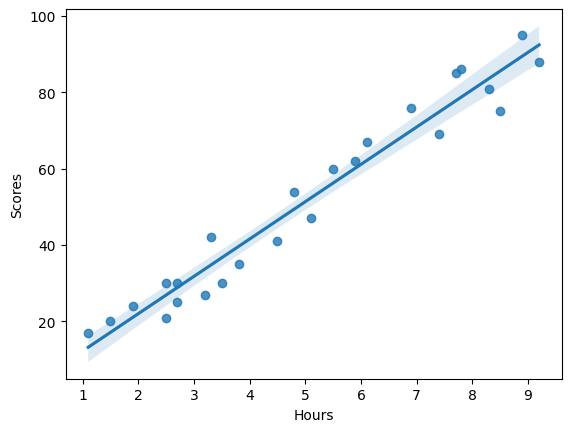

In [65]:
sns.regplot(data=df, x="Hours", y="Scores")

The regplot shows that there is linear relatonship between both the variables, but let's not just confirm it yet and 
check the co-relation co-effecient of scores with hours

In [66]:
df.corr()["Scores"]

Hours     0.976191
Scores    1.000000
Name: Scores, dtype: float64

The coefficient of co-relaton between target variable "score" and hours is really close to 1. 
Thus, now it can be confirmed that the relation is linear

Step 5 - Splitting the Data Set

In [67]:
x = df[["Hours"]]
y= df[["Scores"]]

train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3, random_state=2)

Step 6 - Model Building and Predictions

In [68]:
lr = LinearRegression()

lr.fit(train_x, train_y)


LinearRegression()

In [71]:
y_hat = lr.predict(test_x)
y_hat

array([[11.02900268],
       [25.62801721],
       [19.3712967 ],
       [95.49472962],
       [71.51063432],
       [27.71359072],
       [88.19522235],
       [25.62801721]])

Finding the predicted value that we are supposed to find

In [74]:
lr.predict([[9.25]])

C:\Users\saad\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[96.016123]])

### From the prediction of our model we can say that a student who studys 9.25hrs a day is expected to score 96 percent marks in exams

### Step 7 - Evaluation

In [76]:
metrics.r2_score(test_y, y_hat)

0.9420584734434516

The accuracy of our model is around 94%